In [1]:
# EPR using Sampler and *quantum* backend

# More info https://quantum.cloud.ibm.com/docs/en/tutorials/hello-world

from qiskit import QuantumCircuit, transpile
from qiskit.visualization import plot_histogram
from qiskit_ibm_runtime import QiskitRuntimeService
from qiskit.transpiler import generate_preset_pass_manager
from qiskit_ibm_runtime import SamplerV2 as Sampler
from qiskit_ibm_runtime.fake_provider import FakeFez
import numpy as np

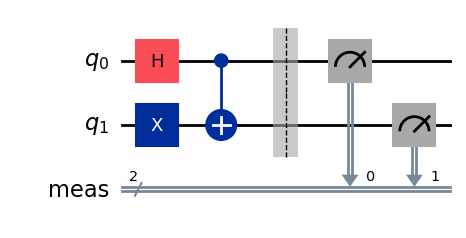

In [2]:
# Define the circuit
qc = QuantumCircuit(2)
qc.h(0)      # Hadamard
qc.x(1)      # NOT
qc.cx(0,1)   # Controlled-NOT

# Measure all the qubits
qc.measure_all()

# Draw the circuit
qc.draw("mpl")

In [3]:
# Connect to your IBM quantum account
service = QiskitRuntimeService()

# Connect to one of your instances
be = service.least_busy(simulator=False, operational=True)

# Set up the sampler
sampler = Sampler(mode=be)
sampler.options.default_shots = 1000

# Generate and optimize actual circuit
pm = generate_preset_pass_manager(backend=be, optimization_level=1)
isa_circuit = pm.run(qc)

# One pub, with one circuit to run.
job = sampler.run([(isa_circuit)])

# Use the job ID to retrieve your job data later
print(f">>> Job ID: {job.job_id()}")


management.get:WARNING:2025-10-21 11:25:33,955: Loading default saved account


>>> Job ID: d3rl35rld2is73fi4m20


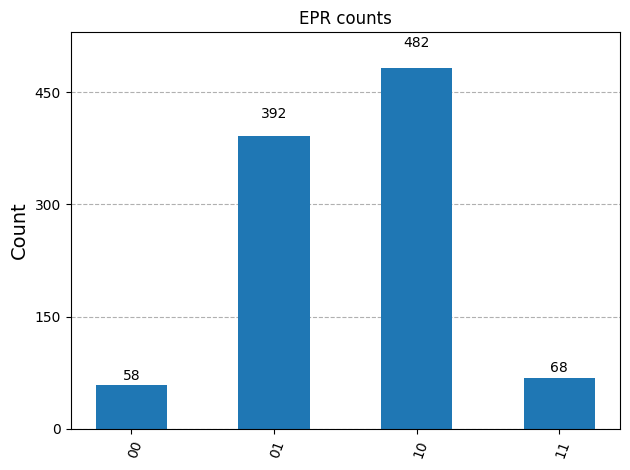

In [4]:
# Get results for the first (and only) PUB
result = job.result()
pub_result = result[0]

# Get the counts of each measure state and plot them
counts = pub_result.data.meas.get_counts()
plot_histogram(counts, title='EPR counts')

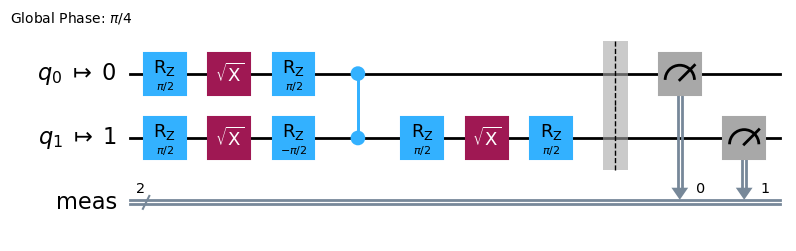

In [5]:
# Draw the produced circuit, for 'curiosity'
isa_circuit.draw("mpl", idle_wires=False)